In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Obtendo o dado

In [122]:
data = np.array([
    [1, 84, 46, 354],
    [2, 73, 20, 190],
    [3, 65, 52, 405],
    [4, 70, 30, 263],
    [5, 76, 57, 451],
    [6, 69, 25, 302],
    [7, 63, 28, 288],
    [8, 72, 36, 385],
    [9, 79, 57, 402],
    [10, 75, 44, 365],
    [11, 27, 24, 209],
    [12, 89, 31, 290],
    [13, 65, 52, 346],
    [14, 57, 23, 254],
    [15, 59, 60, 395],
    [16, 69, 48, 434],
    [17, 60, 34, 220],
    [18, 79, 51, 374],
    [19, 75, 50, 308],
    [20, 82, 34, 220],
    [21, 59, 46, 311],
    [22, 67, 23, 181],
    [23, 85, 37, 274],
    [24, 55, 40, 303],
    [25, 63, 30, 244]
])

In [123]:
df = pd.DataFrame(data)

In [124]:
df.head(5)

,0,1,2,3
0,1,84,46,354
1,2,73,20,190
2,3,65,52,405
3,4,70,30,263
4,5,76,57,451


In [127]:
df = df.rename(columns={1: 'Peso (Kg)', 2: 'Idade (anos)', 3: 'Taxa de Gordura no sangue'})
df.drop(columns=[0], inplace=True)

In [128]:
df.head(5)

,Peso (Kg),Idade (anos),Taxa de Gordura no sangue
0,84,46,354
1,73,20,190
2,65,52,405
3,70,30,263
4,76,57,451


### Entendendo o dado

In [129]:
df.describe()

,Peso (Kg),Idade (anos),Taxa de Gordura no sangue
count,25.000000,25.000000,25.00000
mean,68.680000,39.120000,310.72000
std,12.727005,12.248537,77.82915
min,27.000000,20.000000,181.00000
25%,63.000000,30.000000,254.00000
50%,69.000000,37.000000,303.00000
75%,76.000000,50.000000,374.00000
max,89.000000,60.000000,451.00000


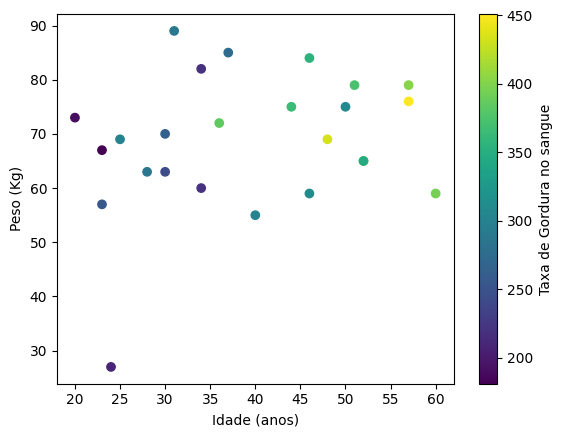

In [130]:
plt.scatter(df['Idade (anos)'], df['Peso (Kg)'], c=df['Taxa de Gordura no sangue'], cmap='viridis')
plt.xlabel('Idade (anos)')
plt.ylabel('Peso (Kg)')
plt.colorbar(label='Taxa de Gordura no sangue')
plt.show()

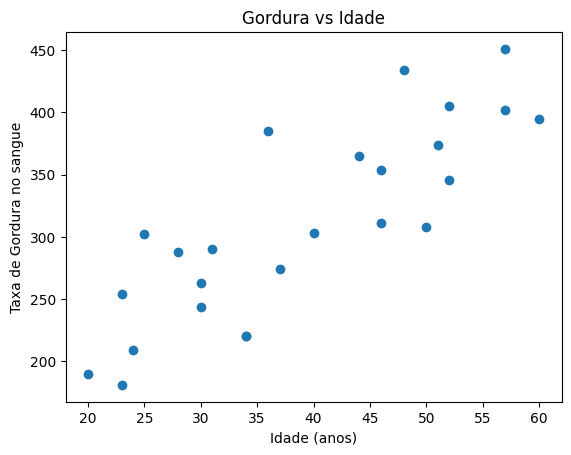

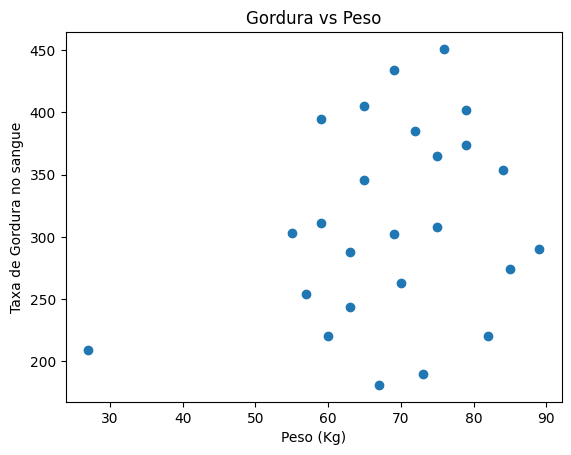

In [131]:
plt.scatter(df['Idade (anos)'], df['Taxa de Gordura no sangue'])
plt.xlabel('Idade (anos)')
plt.ylabel('Taxa de Gordura no sangue')
plt.title('Gordura vs Idade')
plt.show()

plt.scatter(df['Peso (Kg)'], df['Taxa de Gordura no sangue'])
plt.xlabel('Peso (Kg)')
plt.ylabel('Taxa de Gordura no sangue')
plt.title('Gordura vs Peso')
plt.show()


##### Como podemos analisar acima, a idade aparenta estar muito mais relacionado com a taxa de gordura do que o peso


### Ajustando o dado

In [132]:
# Para realizar o estudo, vou separar o dado em treino e teste, para poder validar os diferentes metodos utilizados
X = df.drop('Taxa de Gordura no sangue', axis=1)
y = df['Taxa de Gordura no sangue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", y_train.shape)
print("Testing set shape:", X_test.shape)
print("Testing set shape:", y_test.shape)


Training set shape: (20, 2)
Testing set shape: (20,)
Testing set shape: (5, 2)
Testing set shape: (5,)


In [133]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [134]:
X_test

array([[79, 57],
       [60, 34],
       [84, 46],
       [55, 40],
       [89, 31]])

In [160]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    
def validate_y_pred(X_test,y_test,y_pred):
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print("Mean squared error: %.2f" % mse)
    print('R2: %.2f' % r2)
    print('Mean Absolute Error: %.2f' % mae)

    plt.scatter(y_test, X_test[:,1], color='blue', label='Actual')
    plt.scatter(y_pred, X_test[:,1], color='red', label='Predicted')

    plt.ylabel('Idade (anos)')
    plt.xlabel('Taxa de Gordura no sangue')
    plt.title('Actual vs Predicted')
    plt.legend()
    plt.show()

def plot_weights(w,X,y):
    plt.scatter(X[:,1], y)
    area = np.linspace(X[:,1].min(), X[:,1].max(), 100)
    y_area = w[0] + w[1]*area

    plt.plot(area,y_area, color = 'crimson',linewidth = 3)
    plt.xlabel('Idade (anos)')
    plt.ylabel('Taxa de Gordura no sangue')
    plt.title('Reta dos Pesos')
    plt.show()
    
def get_y_pred(X,w):
    y_pred = np.dot(X_test, w)
    return y_pred

### Obtendo os pesos

##### Invertendo a Matriz

In [143]:
# Mesmo sendo uma pratica considerada ineficaz, 
# vou obter os pesos primeiramente pelo metodo que inverte a matriz apenas para testar as funcoes de predicao
# e assim comparar os resultados quando obter pelo gradiente descendente

def get_weights_EN(X_train, y_train):
    return np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [144]:
pesos = get_weights_EN(X_train, y_train)
pesos

array([1.32573598, 5.65581757])

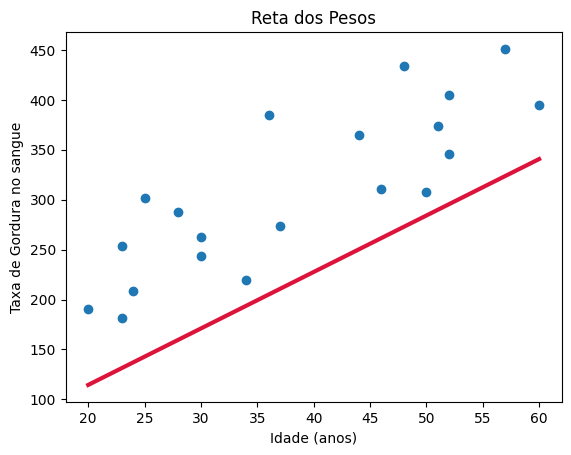

In [145]:
plot_weights(pesos,X_train,y_train)

In [148]:
y_pred = get_y_pred(X_test,pesos)
y_pred

array([427.1147436 , 271.84195597, 371.52943025, 299.14818148,
       293.32084664])

Mean squared error: 730.30
R2: 0.81
Mean Absolute Error: 20.33


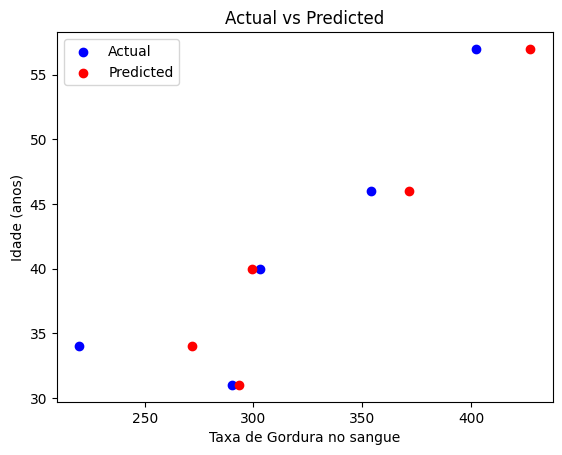

In [161]:
validate_y_pred(X_test,y_test,y_pred)